# MINIMAX - TickTackToe

In [3]:
board = [[" " for _ in range(3)] for _ in range(3)] 

def print_board(): 
    for row in board: 
        print(" | ".join(row)) 
        print("-" * 5) 
        
""" Function to check for a win (checks if the current player has won by checking rows, columns, and diagonals.) """
def check_win(player): 
    for i in range(3): 
        
        """ Check rows and columns """
        if all([board[i][j] == player for j in range(3)]) or all([board[j][i] == player for j in range(3)]): 
            return True 

        # Check diagonals 
    if board[0][0] == board[1][1] == board[2][2] == player or board[0][2] == board[1][1] == board[2][0] == player: 
        return True 
    return False 

# Function to check if the board is full (draw), (checks if the board is full (no empty spaces left) and no player has  won, which results in a draw.) 
def is_full(): 
    return all(cell != " " for row in board for cell in row)

# Function to handle the player's move (ask the current player to input row and column (0-2).it checks if the selected cell is empty before placing the player symbol) 
def player_move(player): 
    while True: 
        row, col = map(int, input(f"Player {player}, enter row and column (0-2): ").split()) 
        if board[row][col] == " ": 
            board[row][col] = player 
            break 
        print("Cell is already occupied! Try again.") 
 
# Main game loop 
def play_game(): 
    player = "X" 
    while True: 
        print_board() 
        player_move(player) 
        if check_win(player): 
            print_board() 
            print(f"Player {player} wins!") 
            break 
        if is_full(): 
            print_board() 
            print("It's a draw!") 
            break 
        player = "O" if player == "X" else "X"  # Switch players 
play_game()   

  |   |  
-----
  |   |  
-----
  |   |  
-----


Player X, enter row and column (0-2):  2 2


  |   |  
-----
  |   |  
-----
  |   | X
-----


Player O, enter row and column (0-2):  1 1


  |   |  
-----
  | O |  
-----
  |   | X
-----


Player X, enter row and column (0-2):  0 2


  |   | X
-----
  | O |  
-----
  |   | X
-----


Player O, enter row and column (0-2):  1 2


  |   | X
-----
  | O | O
-----
  |   | X
-----


Player X, enter row and column (0-2):  1 0


  |   | X
-----
X | O | O
-----
  |   | X
-----


Player O, enter row and column (0-2):  0 1


  | O | X
-----
X | O | O
-----
  |   | X
-----


Player X, enter row and column (0-2):  2 1


  | O | X
-----
X | O | O
-----
  | X | X
-----


Player O, enter row and column (0-2):  2 0


  | O | X
-----
X | O | O
-----
O | X | X
-----


Player X, enter row and column (0-2):  0 0


X | O | X
-----
X | O | O
-----
O | X | X
-----
It's a draw!


# CONNECT FOUR

In [5]:
import numpy as np

# Constants
ROW_COUNT = 6
COLUMN_COUNT = 7

# Create the board
def create_board():
    return np.zeros((ROW_COUNT, COLUMN_COUNT))

# Drop a piece in the board
def drop_piece(board, row, col, piece):
    board[row][col] = piece

# Check if the column is valid for a move
def is_valid_location(board, col):
    return board[ROW_COUNT - 1][col] == 0

# Get the next open row in the column
def get_next_open_row(board, col):
    for r in range(ROW_COUNT):
        if board[r][col] == 0:
            return r

# Print the board
def print_board(board):
    print(np.flip(board, 0))

# Check for a win condition
def winning_move(board, piece):
    # Check horizontal locations
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT):
            if (board[r][c] == piece and board[r][c + 1] == piece and 
                board[r][c + 2] == piece and board[r][c + 3] == piece):
                return True

    # Check vertical locations
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT - 3):
            if (board[r][c] == piece and board[r + 1][c] == piece and 
                board[r + 2][c] == piece and board[r + 3][c] == piece):
                return True

    # Check positively sloped diagonals
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT - 3):
            if (board[r][c] == piece and board[r + 1][c + 1] == piece and 
                board[r + 2][c + 2] == piece and board[r + 3][c + 3] == piece):
                return True

    # Check negatively sloped diagonals
    for c in range(COLUMN_COUNT - 3):
        for r in range(3, ROW_COUNT):
            if (board[r][c] == piece and board[r - 1][c + 1] == piece and 
                board[r - 2][c + 2] == piece and board[r - 3][c + 3] == piece):
                return True

# Main function to run the game
def play_game():
    board = create_board()
    game_over = False
    turn = 0
    
    print_board(board)

    while not game_over:
        # Ask for Player Input
        if turn == 0:
            col = int(input("Player 1 Make your Selection (0-6): ")) 
            piece = 1
        else:
            col = int(input("Player 2 Make your Selection (0-6): ")) 
            piece = 2

        if is_valid_location(board, col):
            row = get_next_open_row(board, col)
            drop_piece(board, row, col, piece)

            if winning_move(board, piece):
                print_board(board)
                print(f"Player {piece} wins!")
                game_over = True
        
        print_board(board)
        turn += 1
        turn %= 2

# Start the game
if __name__ == "__main__":
    play_game()


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


Player 1 Make your Selection (0-6):  5


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


Player 2 Make your Selection (0-6):  1


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 0.]]


Player 1 Make your Selection (0-6):  6


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1.]]


Player 2 Make your Selection (0-6):  0


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 0. 0. 0. 1. 1.]]


Player 1 Make your Selection (0-6):  4


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 0. 0. 1. 1. 1.]]


Player 2 Make your Selection (0-6):  6


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2.]
 [2. 2. 0. 0. 1. 1. 1.]]


Player 1 Make your Selection (0-6):  3


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2.]
 [2. 2. 0. 1. 1. 1. 1.]]
Player 1 wins!
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2.]
 [2. 2. 0. 1. 1. 1. 1.]]


# ALPHA BETA PRUNING

In [12]:
###### import math
import random

# Initialize board (8x8)
def create_board():
    board = [[" " for _ in range(8)] for _ in range(8)]
    board[3][3], board[4][4] = "O", "O"
    board[3][4], board[4][3] = "X", "X"
    return board

# Display board
def print_board(board):
    print("  " + " ".join(str(i) for i in range(8)))
    for idx, row in enumerate(board):
        print(idx, " ".join(row))

# Directions (8 neighbors)
DIRECTIONS = [(-1,-1), (-1,0), (-1,1),
              (0,-1),         (0,1),
              (1,-1),  (1,0), (1,1)]

# Check if move is valid
def is_valid_move(board, row, col, player):
    if board[row][col] != " ":
        return False
    opponent = "O" if player == "X" else "X"
    flips = []
    for dr, dc in DIRECTIONS:
        r, c = row+dr, col+dc
        line = []
        while 0 <= r < 8 and 0 <= c < 8 and board[r][c] == opponent:
            line.append((r,c))
            r += dr
            c += dc
        if line and 0 <= r < 8 and 0 <= c < 8 and board[r][c] == player:
            flips.extend(line)
    return flips if flips else False

# Get all valid moves
def valid_moves(board, player):
    moves = []
    for r in range(8):
        for c in range(8):
            if is_valid_move(board, r, c, player):
                moves.append((r,c))
    return moves

# Apply move
def make_move(board, row, col, player):
    flips = is_valid_move(board, row, col, player)
    if not flips:
        return False
    board[row][col] = player
    for r,c in flips:
        board[r][c] = player
    return True

# Evaluation: disc difference
def evaluate_board(board):
    x_count = sum(row.count("X") for row in board)
    o_count = sum(row.count("O") for row in board)
    return x_count - o_count

# Alpha-beta search
def alphabeta(board, depth, alpha, beta, maximizing_player):
    if depth == 0 or is_game_over(board):
        return evaluate_board(board), None

    player = "X" if maximizing_player else "O"
    moves = valid_moves(board, player)
    if not moves:
        return evaluate_board(board), None

    best_move = None
    if maximizing_player:  # Human
        max_eval = -math.inf
        for move in moves:
            new_board = [row[:] for row in board]
            make_move(new_board, move[0], move[1], player)
            eval, _ = alphabeta(new_board, depth-1, alpha, beta, False)
            if eval > max_eval:
                max_eval = eval
                best_move = move
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval, best_move
    else:  # AI
        min_eval = math.inf
        for move in moves:
            new_board = [row[:] for row in board]
            make_move(new_board, move[0], move[1], player)
            eval, _ = alphabeta(new_board, depth-1, alpha, beta, True)
            if eval < min_eval:
                min_eval = eval
                best_move = move
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval, best_move

# Check if game is over
def is_game_over(board):
    return not valid_moves(board, "X") and not valid_moves(board, "O")

# Main game loop
def play_game():
    board = create_board()
    current_player = "X"  # Human goes first

    while not is_game_over(board):
        print_board(board)
        moves = valid_moves(board, current_player)

        if not moves:
            print(f"{current_player} has no valid moves, skipping turn.")
            current_player = "O" if current_player == "X" else "X"
            continue

        if current_player == "X":
            print("Your turn! Valid moves:", moves)
            try:
                row, col = map(int, input("Enter row and col (e.g., 2 3): ").split())
                if (row, col) in moves:
                    make_move(board, row, col, "X")
                    current_player = "O"
                else:
                    print("Invalid move, try again.")
            except:
                print("Invalid input, try again.")
        else:
            print("AI thinking...")
            _, move = alphabeta(board, depth=3, alpha=-math.inf, beta=math.inf, maximizing_player=False)
            if move:
                make_move(board, move[0], move[1], "O")
                print(f"AI plays: {move}")
            current_player = "X"

    # Final board
    print_board(board)
    score = evaluate_board(board)
    if score > 0:
        print("You win!")
    elif score < 0:
        print("AI wins!")
    else:
        print("It's a draw!")

# Run the game
play_game()


  0 1 2 3 4 5 6 7
0                
1                
2                
3       O X      
4       X O      
5                
6                
7                
Your turn! Valid moves: [(2, 3), (3, 2), (4, 5), (5, 4)]


Enter row and col (e.g., 2 3):  6 4


Invalid move, try again.
  0 1 2 3 4 5 6 7
0                
1                
2                
3       O X      
4       X O      
5                
6                
7                
Your turn! Valid moves: [(2, 3), (3, 2), (4, 5), (5, 4)]


Enter row and col (e.g., 2 3):  5 4


  0 1 2 3 4 5 6 7
0                
1                
2                
3       O X      
4       X X      
5         X      
6                
7                
AI thinking...
AI plays: (3, 5)
  0 1 2 3 4 5 6 7
0                
1                
2                
3       O O O    
4       X X      
5         X      
6                
7                
Your turn! Valid moves: [(2, 2), (2, 3), (2, 4), (2, 5), (2, 6)]


Enter row and col (e.g., 2 3):  2 6


  0 1 2 3 4 5 6 7
0                
1                
2             X  
3       O O X    
4       X X      
5         X      
6                
7                
AI thinking...
AI plays: (3, 6)
  0 1 2 3 4 5 6 7
0                
1                
2             X  
3       O O O O  
4       X X      
5         X      
6                
7                
Your turn! Valid moves: [(2, 2), (2, 3), (2, 4), (2, 5), (4, 6)]


Enter row and col (e.g., 2 3):  4 6


  0 1 2 3 4 5 6 7
0                
1                
2             X  
3       O O O X  
4       X X   X  
5         X      
6                
7                
AI thinking...
AI plays: (3, 7)
  0 1 2 3 4 5 6 7
0                
1                
2             X  
3       O O O O O
4       X X   X  
5         X      
6                
7                
Your turn! Valid moves: [(2, 2), (2, 3), (2, 4), (2, 5)]


Enter row and col (e.g., 2 3):  2 5


  0 1 2 3 4 5 6 7
0                
1                
2           X X  
3       O X O O O
4       X X   X  
5         X      
6                
7                
AI thinking...
AI plays: (1, 4)
  0 1 2 3 4 5 6 7
0                
1         O      
2           O X  
3       O X O O O
4       X X   X  
5         X      
6                
7                
Your turn! Valid moves: [(1, 6), (2, 2), (2, 3), (2, 4), (3, 2)]


Enter row and col (e.g., 2 3):  1 6


  0 1 2 3 4 5 6 7
0                
1         O   X  
2           X X  
3       O X O O O
4       X X   X  
5         X      
6                
7                
AI thinking...
AI plays: (0, 6)
  0 1 2 3 4 5 6 7
0             O  
1         O   O  
2           X O  
3       O X O O O
4       X X   X  
5         X      
6                
7                
Your turn! Valid moves: [(0, 3), (0, 7), (1, 7), (2, 2), (2, 3), (2, 4), (2, 7), (3, 2), (4, 5), (4, 7)]


Enter row and col (e.g., 2 3):  0 7


  0 1 2 3 4 5 6 7
0             O X
1         O   X  
2           X O  
3       O X O O O
4       X X   X  
5         X      
6                
7                
AI thinking...
AI plays: (5, 5)
  0 1 2 3 4 5 6 7
0             O X
1         O   X  
2           X O  
3       O X O O O
4       X O   O  
5         X O    
6                
7                
Your turn! Valid moves: [(0, 3), (0, 5), (2, 3), (2, 7), (3, 2), (4, 5), (4, 7), (5, 6)]


Enter row and col (e.g., 2 3):  0 5


  0 1 2 3 4 5 6 7
0           X X X
1         O   X  
2           X O  
3       O X O O O
4       X O   O  
5         X O    
6                
7                
AI thinking...
AI plays: (2, 4)
  0 1 2 3 4 5 6 7
0           X X X
1         O   X  
2         O O O  
3       O O O O O
4       X O   O  
5         X O    
6                
7                
Your turn! Valid moves: [(0, 4), (2, 3), (4, 5), (5, 6)]


Enter row and col (e.g., 2 3):  5 6


  0 1 2 3 4 5 6 7
0           X X X
1         O   X  
2         O O X  
3       O O O X O
4       X O   X  
5         X X X  
6                
7                
AI thinking...
AI plays: (1, 7)
  0 1 2 3 4 5 6 7
0           X X X
1         O   X O
2         O O O  
3       O O O X O
4       X O   X  
5         X X X  
6                
7                
Your turn! Valid moves: [(0, 3), (0, 4), (1, 3), (2, 2), (2, 3), (2, 7), (3, 2), (4, 5)]


Enter row and col (e.g., 2 3):  4 5


  0 1 2 3 4 5 6 7
0           X X X
1         O   X O
2         O O O  
3       O O O X O
4       X X X X  
5         X X X  
6                
7                
AI thinking...
AI plays: (6, 4)
  0 1 2 3 4 5 6 7
0           X X X
1         O   X O
2         O O O  
3       O O O X O
4       X O X O  
5         O O X  
6         O      
7                
Your turn! Valid moves: [(0, 3), (1, 5), (2, 3), (2, 7), (3, 2), (4, 7), (5, 3), (6, 3), (6, 5)]


Enter row and col (e.g., 2 3):  4 7


  0 1 2 3 4 5 6 7
0           X X X
1         O   X O
2         O O O  
3       O O O X O
4       X O X X X
5         O O X  
6         O      
7                
AI thinking...
AI plays: (5, 7)
  0 1 2 3 4 5 6 7
0           X X X
1         O   X O
2         O O O  
3       O O O X O
4       X O X O O
5         O O O O
6         O      
7                
Your turn! Valid moves: [(0, 3), (1, 5), (2, 3), (2, 7), (3, 2), (6, 3), (6, 5), (6, 6), (6, 7)]


Enter row and col (e.g., 2 3):  6 7


  0 1 2 3 4 5 6 7
0           X X X
1         O   X O
2         O O O  
3       O O O X O
4       X O X O O
5         O O X O
6         O     X
7                
AI thinking...
AI plays: (2, 7)
  0 1 2 3 4 5 6 7
0           X X X
1         O   X O
2         O O O O
3       O O O O O
4       X O O O O
5         O O X O
6         O     X
7                
Your turn! Valid moves: [(2, 3), (5, 3), (6, 5)]


Enter row and col (e.g., 2 3):  6 5


  0 1 2 3 4 5 6 7
0           X X X
1         O   X O
2         O O O O
3       O O O O O
4       X O O O O
5         X O X O
6         O X   X
7                
AI thinking...
AI plays: (5, 3)
  0 1 2 3 4 5 6 7
0           X X X
1         O   X O
2         O O O O
3       O O O O O
4       O O O O O
5       O O O X O
6         O X   X
7                
Your turn! Valid moves: [(1, 5), (2, 3), (3, 2), (5, 2), (6, 3)]


Enter row and col (e.g., 2 3):  5 2


  0 1 2 3 4 5 6 7
0           X X X
1         O   X O
2         O X O O
3       O X O O O
4       X O O O O
5     X X X X X O
6         O X   X
7                
AI thinking...
AI plays: (1, 5)
  0 1 2 3 4 5 6 7
0           X X X
1         O O O O
2         O O O O
3       O X O O O
4       X O O O O
5     X X X X X O
6         O X   X
7                
Your turn! Valid moves: [(0, 4), (2, 2), (2, 3), (3, 2), (4, 2), (6, 3), (7, 3), (7, 4), (7, 5)]


Enter row and col (e.g., 2 3):  7 5


  0 1 2 3 4 5 6 7
0           X X X
1         O O O O
2         O O O O
3       O X O O O
4       X O O O O
5     X X X X X O
6         X X   X
7           X    
AI thinking...
AI plays: (4, 2)
  0 1 2 3 4 5 6 7
0           X X X
1         O O O O
2         O O O O
3       O X O O O
4     O O O O O O
5     X X X X X O
6         X X   X
7           X    
Your turn! Valid moves: [(0, 4), (2, 2), (2, 3), (3, 1), (3, 2), (5, 1)]


Enter row and col (e.g., 2 3):  5 1


  0 1 2 3 4 5 6 7
0           X X X
1         O X O O
2         X O O O
3       X X O O O
4     X O O O O O
5   X X X X X X O
6         X X   X
7           X    
AI thinking...
AI plays: (0, 4)
  0 1 2 3 4 5 6 7
0         O X X X
1         O O O O
2         X O O O
3       X X O O O
4     X O O O O O
5   X X X X X X O
6         X X   X
7           X    
Your turn! Valid moves: [(0, 3), (2, 3), (3, 2)]


Enter row and col (e.g., 2 3):  0 3


  0 1 2 3 4 5 6 7
0       X X X X X
1         O O O O
2         X O O O
3       X X O O O
4     X O O O O O
5   X X X X X X O
6         X X   X
7           X    
AI thinking...
AI plays: (2, 3)
  0 1 2 3 4 5 6 7
0       X X X X X
1         O O O O
2       O O O O O
3       O O O O O
4     X O O O O O
5   X X X X X X O
6         X X   X
7           X    
Your turn! Valid moves: [(1, 2), (1, 3), (2, 2), (3, 2)]


Enter row and col (e.g., 2 3):  2 2


  0 1 2 3 4 5 6 7
0       X X X X X
1         O O O O
2     X O O O O O
3       X O O O O
4     X O X O O O
5   X X X X X X O
6         X X   X
7           X    
AI thinking...
AI plays: (2, 1)
  0 1 2 3 4 5 6 7
0       X X X X X
1         O O O O
2   O O O O O O O
3       X O O O O
4     X O X O O O
5   X X X X X X O
6         X X   X
7           X    
Your turn! Valid moves: [(1, 1), (1, 2), (1, 3), (3, 2)]


Enter row and col (e.g., 2 3):  3 2


  0 1 2 3 4 5 6 7
0       X X X X X
1         X O O O
2   O O X O O O O
3     X X O O O O
4     X X X O O O
5   X X X X X X O
6         X X   X
7           X    
AI thinking...
AI plays: (4, 1)
  0 1 2 3 4 5 6 7
0       X X X X X
1         X O O O
2   O O X O O O O
3     X X O O O O
4   O O O O O O O
5   X X X X X X O
6         X X   X
7           X    
Your turn! Valid moves: [(1, 0), (1, 1), (1, 2), (2, 0), (3, 0), (3, 1), (5, 0)]


Enter row and col (e.g., 2 3):  5 0


  0 1 2 3 4 5 6 7
0       X X X X X
1         X O O O
2   O O X O O O O
3     X X O O O O
4   X O O O O O O
5 X X X X X X X O
6         X X   X
7           X    
AI thinking...
AI plays: (1, 3)
  0 1 2 3 4 5 6 7
0       X X X X X
1       O O O O O
2   O O O O O O O
3     X O O O O O
4   X O O O O O O
5 X X X X X X X O
6         X X   X
7           X    
Your turn! Valid moves: [(1, 0), (1, 1), (1, 2), (3, 1)]


Enter row and col (e.g., 2 3):  3 1


  0 1 2 3 4 5 6 7
0       X X X X X
1       X O O O O
2   O X O O O O O
3   X X O O O O O
4   X X O O O O O
5 X X X X X X X O
6         X X   X
7           X    
AI thinking...
AI plays: (0, 2)
  0 1 2 3 4 5 6 7
0     O X X X X X
1       O O O O O
2   O X O O O O O
3   X X O O O O O
4   X X O O O O O
5 X X X X X X X O
6         X X   X
7           X    
Your turn! Valid moves: [(0, 1), (1, 0), (1, 1), (1, 2), (2, 0)]


Enter row and col (e.g., 2 3):  1 0


  0 1 2 3 4 5 6 7
0     O X X X X X
1 X     O O O O O
2   X X O O O O O
3   X X O O O O O
4   X X O O O O O
5 X X X X X X X O
6         X X   X
7           X    
AI thinking...
AI plays: (7, 6)
  0 1 2 3 4 5 6 7
0     O X X X X X
1 X     O O O O O
2   X X O O O O O
3   X X O O O O O
4   X X O O O O O
5 X X X X O X X O
6         X O   X
7           X O  
Your turn! Valid moves: [(0, 1), (1, 2), (6, 6), (7, 4), (7, 7)]


Enter row and col (e.g., 2 3):  6 6


  0 1 2 3 4 5 6 7
0     O X X X X X
1 X     O O O O O
2   X X O O O O O
3   X X O O O O O
4   X X O O O O O
5 X X X X O X X O
6         X X X X
7           X O  
AI thinking...
AI plays: (7, 4)
  0 1 2 3 4 5 6 7
0     O X X X X X
1 X     O O O O O
2   X X O O O O O
3   X X O O O O O
4   X X O O O O O
5 X X X X O X O O
6         O O X X
7         O O O  
Your turn! Valid moves: [(0, 1), (1, 2), (6, 3), (7, 3)]


Enter row and col (e.g., 2 3):  7 3


  0 1 2 3 4 5 6 7
0     O X X X X X
1 X     O O O O O
2   X X O O O O O
3   X X O O O O O
4   X X O O O O O
5 X X X X O X O O
6         X O X X
7       X O O O  
AI thinking...
AI plays: (7, 7)
  0 1 2 3 4 5 6 7
0     O X X X X X
1 X     O O O O O
2   X X O O O O O
3   X X O O O O O
4   X X O O O O O
5 X X X X O O O O
6         X O O O
7       X O O O O
Your turn! Valid moves: [(0, 1)]


Enter row and col (e.g., 2 3):  0 1


  0 1 2 3 4 5 6 7
0   X X X X X X X
1 X     O O O O O
2   X X O O O O O
3   X X O O O O O
4   X X O O O O O
5 X X X X O O O O
6         X O O O
7       X O O O O
AI thinking...
AI plays: (2, 0)
  0 1 2 3 4 5 6 7
0   X X X X X X X
1 X     O O O O O
2 O O O O O O O O
3   O X O O O O O
4   X O O O O O O
5 X X X O O O O O
6         O O O O
7       X O O O O
Your turn! Valid moves: [(1, 1), (1, 2), (3, 0), (4, 0), (6, 3)]


Enter row and col (e.g., 2 3):  3 0


  0 1 2 3 4 5 6 7
0   X X X X X X X
1 X     O O O O O
2 X O O O O O O O
3 X X X O O O O O
4   X O O O O O O
5 X X X O O O O O
6         O O O O
7       X O O O O
AI thinking...
AI plays: (4, 0)
  0 1 2 3 4 5 6 7
0   X X X X X X X
1 X     O O O O O
2 X O O O O O O O
3 X O X O O O O O
4 O O O O O O O O
5 X X X O O O O O
6         O O O O
7       X O O O O
Your turn! Valid moves: [(1, 1), (1, 2), (6, 3)]


Enter row and col (e.g., 2 3):  6 3


  0 1 2 3 4 5 6 7
0   X X X X X X X
1 X     X O O O O
2 X O O X O O O O
3 X O X X O O O O
4 O O O X O O O O
5 X X X X O O O O
6       X O O O O
7       X O O O O
AI thinking...
AI plays: (0, 0)
  0 1 2 3 4 5 6 7
0 O X X X X X X X
1 O     X O O O O
2 O O O X O O O O
3 O O X X O O O O
4 O O O X O O O O
5 X X X X O O O O
6       X O O O O
7       X O O O O
Your turn! Valid moves: [(1, 1), (1, 2)]


Enter row and col (e.g., 2 3):  1 1


  0 1 2 3 4 5 6 7
0 O X X X X X X X
1 O X   X O O O O
2 O X X X O O O O
3 O X X X O O O O
4 O X O X O O O O
5 X X X X O O O O
6       X O O O O
7       X O O O O
AI thinking...
AI plays: (6, 0)
  0 1 2 3 4 5 6 7
0 O X X X X X X X
1 O X   X O O O O
2 O X X X O O O O
3 O X X X O O O O
4 O X O X O O O O
5 O O X X O O O O
6 O     X O O O O
7       X O O O O
Your turn! Valid moves: [(6, 1)]


Enter row and col (e.g., 2 3):  6 1


  0 1 2 3 4 5 6 7
0 O X X X X X X X
1 O X   X O O O O
2 O X X X O O O O
3 O X X X O O O O
4 O X O X O O O O
5 O X X X O O O O
6 O X   X O O O O
7       X O O O O
AI thinking...
AI plays: (7, 2)
  0 1 2 3 4 5 6 7
0 O X X X X X X X
1 O X   X O O O O
2 O X X X O O O O
3 O X X X O O O O
4 O X O X O O O O
5 O X X X O O O O
6 O O   O O O O O
7     O O O O O O
Your turn! Valid moves: [(7, 0), (7, 1)]


Enter row and col (e.g., 2 3):  7 1


  0 1 2 3 4 5 6 7
0 O X X X X X X X
1 O X   X O O O O
2 O X X X O O O O
3 O X X X O O O O
4 O X O X O O O O
5 O X X X O O O O
6 O X   O O O O O
7   X O O O O O O
AI thinking...
AI plays: (7, 0)
  0 1 2 3 4 5 6 7
0 O X X X X X X X
1 O X   X O O O O
2 O X X X O O O O
3 O X X X O O O O
4 O X O O O O O O
5 O X O X O O O O
6 O O   O O O O O
7 O O O O O O O O
Your turn! Valid moves: [(6, 2)]


Enter row and col (e.g., 2 3):  6 2


  0 1 2 3 4 5 6 7
0 O X X X X X X X
1 O X   X O O O O
2 O X X X O O O O
3 O X X X O O O O
4 O X X O O O O O
5 O X X X O O O O
6 O O X O O O O O
7 O O O O O O O O
AI thinking...
AI plays: (1, 2)
  0 1 2 3 4 5 6 7
0 O X X X X X X X
1 O O O O O O O O
2 O O O O O O O O
3 O X O X O O O O
4 O X O O O O O O
5 O X O X O O O O
6 O O O O O O O O
7 O O O O O O O O
AI wins!


# DEFUZZIFICATIONS

At 25°C:
Cold Membership: 0.00
Comfortable Membership: 0.83
Hot Membership: 0.00
Crisp Output (Net Action): 0.00%
No action required: Temperature is balanced.


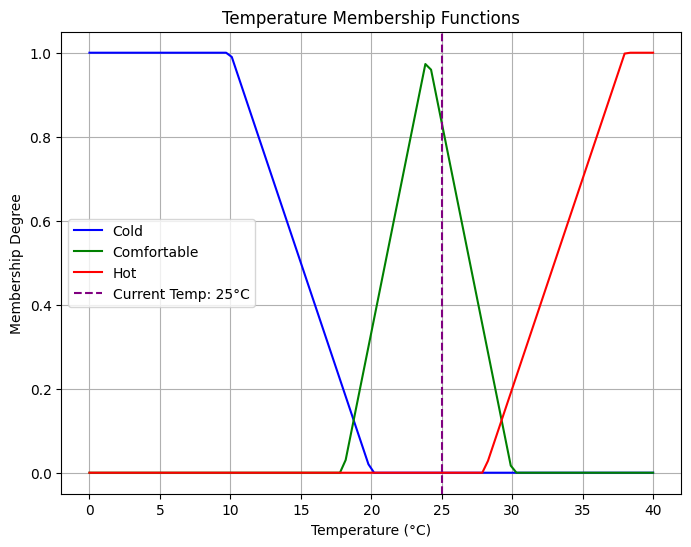

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Membership functions
def cold_membership(temp):
    """Membership function for 'Cold' temperature.""" 
    return np.maximum(0, np.minimum(1, (20 - temp) / 10))
def comfortable_membership(temp):
    """Membership function for 'Comfortable' temperature."""
    return np.maximum(0, np.minimum((temp - 18) / 6, (30 - temp) / 6)) 
def hot_membership(temp):
    """Membership function for 'Hot' temperature."""
    return np.maximum(0, np.minimum(1, (temp - 28) / 10))

# Fuzzy rules
def heating_degree(temp):
    """Heating percentage based on 'Cold' membership."""
    return cold_membership(temp) * 100 # Heating required in percentage 
def cooling_degree(temp):
    """Cooling percentage based on 'Hot' membership."""
    return hot_membership(temp) * 100 # Cooling required in percentage 
def defuzzify(temp):
    """Compute the crisp output as the weighted average of heating and cooling.""" 
    heating = heating_degree(temp)
    cooling = cooling_degree(temp)
    net_action = heating - cooling # Positive for heating, negative for cooling 
    return net_action

# Simulating the system for 25°C 
temperature = 25
cold_degree = cold_membership(temperature) 
comfortable_degree = comfortable_membership(temperature) 
hot_degree = hot_membership(temperature)
crisp_output = defuzzify(temperature)

print(f"At {temperature}°C:")
print(f"Cold Membership: {cold_degree:.2f}") 
print(f"Comfortable Membership: {comfortable_degree:.2f}") 
print(f"Hot Membership: {hot_degree:.2f}")
print(f"Crisp Output (Net Action): {crisp_output:.2f}%") 

if crisp_output > 0:
    print(f"Heating required: {crisp_output:.2f}%") 
elif crisp_output < 0:
    print(f"Cooling required: {abs(crisp_output):.2f}%") 
else:
    print("No action required: Temperature is balanced.") # Visualizing membership functions
    
def plot_membership_functions():
    """Plot the membership functions for 'Cold,' 'Comfortable,' and 'Hot'.""" 
    temperature_range = np.linspace(0, 40, 100)
    cold = [cold_membership(t) 
    for t in temperature_range]
    comfortable = [comfortable_membership(t) 
    for t in temperature_range] 
    hot = [hot_membership(t) 
    for t in temperature_range] 
    plt.figure(figsize=(8, 6))
    plt.plot(temperature_range, cold, label="Cold", color="blue") 
    plt.plot(temperature_range, comfortable, label="Comfortable", color="green") 
    plt.plot(temperature_range, hot, label="Hot", color="red")
    plt.axvline(x=temperature, color='purple', linestyle='--', label=f"Current Temp: {temperature}°C") 
    plt.title("Temperature Membership Functions")
    plt.xlabel("Temperature (°C)") 
    plt.ylabel("Membership Degree") 
    plt.legend()
    plt.grid(True) 
    plt.show()
    
plot_membership_functions()


In [8]:
def fuzzy_speed_control(slipperiness):
    slippery_speed = max(0, min(1, 1 - slipperiness))
    normal_speed = max(0, min(1, 1 - abs(slipperiness - 0.5) * 2))
    dry_speed = max(0, min(1, slipperiness)) 
    return slippery_speed, normal_speed, dry_speed
def defuzzify(slippery_speed, normal_speed, dry_speed):
    speeds = {
        'slippery': 30,
        'normal': 50,  
        'dry': 70      
    }
    numerator = (speeds['slippery'] * slippery_speed +
                 speeds['normal'] * normal_speed +
                 speeds['dry'] * dry_speed)
    denominator = (slippery_speed + normal_speed + dry_speed)
    return numerator / denominator if denominator != 0    else 0
slipperiness_value = 0.6
slippery_speed, normal_speed, dry_speed = fuzzy_speed_control(slipperiness_value)
crisp_output = defuzzify(slippery_speed, normal_speed, dry_speed)
print(f'Crisp Output Speed: {crisp_output}')


Crisp Output Speed: 52.222222222222214


# RULE EVALUATION

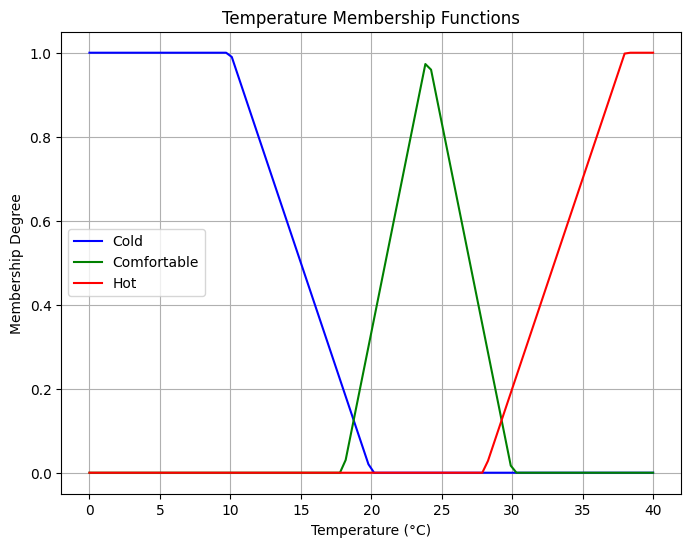

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Membership functions for "Cold," "Comfortable," and "Hot" 
def cold_membership(temp):
    """Membership function for 'Cold' temperature."""
    return np.maximum(0, np.minimum(1, (20 - temp) / 10)) # Triangle with peak at 10°C 
def comfortable_membership(temp):
    """Membership function for 'Comfortable' temperature."""
    return np.maximum(0, np.minimum((temp - 18) / 6, (30 - temp) / 6)) # Trapezoidal shape 
def hot_membership(temp):
    """Membership function for 'Hot' temperature."""
    return np.maximum(0, np.minimum(1, (temp - 28) / 10)) # Triangle with peak at 40°C

# Rule-based control actions 
def control_action(temp):
    """Determine control action based on fuzzy rules.""" 
    cold_degree = cold_membership(temp) 
    comfortable_degree = comfortable_membership(temp) 
    hot_degree = hot_membership(temp)

# Rule evaluation
    if cold_degree > max(comfortable_degree, hot_degree): 
        return "Increase heating"
    elif comfortable_degree > max(cold_degree, hot_degree): 
        return "Maintain current setting"
    elif hot_degree > max(cold_degree, comfortable_degree): 
        return "Increase cooling"
# Simulate the system for specific temperatures 
    temperatures = [18, 24, 32]
    actions = []

    for temp in temperatures:
        action = control_action(temp) 
        actions.append((temp, action))
        print(f"At {temp}°C, the system suggests: {action}") # Visualizing membership functions
def plot_membership_functions():
    """Plot the membership functions for 'Cold,' 'Comfortable,' and 'Hot'.""" 
    temperature_range = np.linspace(0, 40, 100)
    cold = [cold_membership(t) for t in temperature_range]
    comfortable = [comfortable_membership(t) for t in temperature_range] 
    hot = [hot_membership(t) for t in temperature_range]
    plt.figure(figsize=(8, 6))
    plt.plot(temperature_range, cold, label="Cold", color="blue") 
    plt.plot(temperature_range, comfortable, label="Comfortable", color="green") 
    plt.plot(temperature_range, hot, label="Hot", color="red") 
    plt.title("Temperature Membership Functions")
    plt.xlabel("Temperature (°C)") 
    plt.ylabel("Membership Degree") 
    plt.legend()
    plt.grid(True) 
    plt.show()
# Plot the membership functions plot_membership_functions()
plot_membership_functions()